In [1]:
from pbc_purity import *
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Test

In [3]:
n_list = np.arange(2,6)
chi = 3
k_copies = 2

In [9]:
purity_against_n = []
for n in n_list:
    samples = trace_samples(n, chi, num_samples=1000, scaled=False)
    purity = samples_to_purity(samples, k_copies)
    purity_against_n.append(purity)

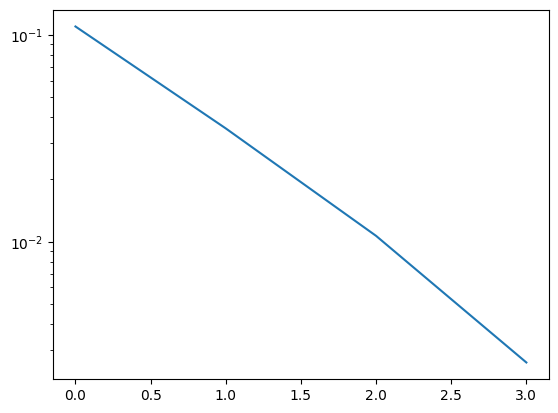

In [11]:
plt.plot(purity_against_n)
plt.yscale('log')

In [31]:
n_list = np.arange(2,11)
chi = 4
k_copies = 2

In [32]:
scaled_purity_against_n = []
for n in n_list:
    samples = trace_samples(n, chi, num_samples=1000, scaled=True)
    purity = samples_to_purity(samples, k_copies)
    scaled_purity_against_n.append(purity)

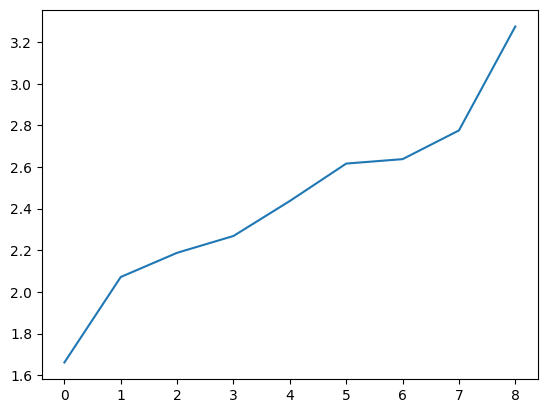

In [33]:
plt.plot(scaled_purity_against_n)

In [13]:
n = 90
haar_purity(n,3), haar_purity(n,3, scaled=True),  haar_purity(n,3) * (2**(n*3))

(3.162659382969157e-81, 6.0, 6.0)

In [14]:
import pickle
with open("constant.pickle", "rb") as f:
    data = pickle.load(f)

In [15]:
data

array([[0.5658091 , 0.18935086, 0.42811502, ..., 0.32794658, 0.48275449,
        0.40377995],
       [0.23686358, 0.008867  , 0.22609879, ..., 0.16060467, 0.13310979,
        0.22432828],
       [0.0087996 , 0.0778421 , 0.10369411, ..., 0.01746856, 0.08012098,
        0.10548259],
       [0.03734329, 0.02425968, 0.06000476, ..., 0.02132246, 0.09489946,
        0.09579319]])

# Data

In [22]:
import pickle
with open("constant.pickle", "rb") as f: 
    c_data = pickle.load(f)
    
with open("linear.pickle", "rb") as f: 
    l_data = pickle.load(f)

In [23]:
max_n = 50
n_incr = 2


In [75]:
def process_data(c_data, k_copies, max_n=50, n_incr=2, batch_size=1000): 
    num_samples = c_data.shape[1]
    num_batches = int(num_samples//batch_size)
    
    n_list = np.arange(2, int(max_n)+1, int(n_incr))
    h_purity = [haar_purity(n, k_copies) for n in n_list]

    err_mean = []
    err_std = []
    for i in range(25):
        batches = [c_data[i,j*batch_size:(j+1)*batch_size] for j in range(num_batches)]
        purities = [samples_to_purity(batch, k_copies) for batch in batches]
        one_err = [np.sqrt(2**(n_list[i]*k_copies) * (p-h_purity[i])) for p in purities]
        err_mean.append(np.mean(one_err))
        err_std.append(np.std(one_err))
    
    return err_mean, err_std

## chi = 4 

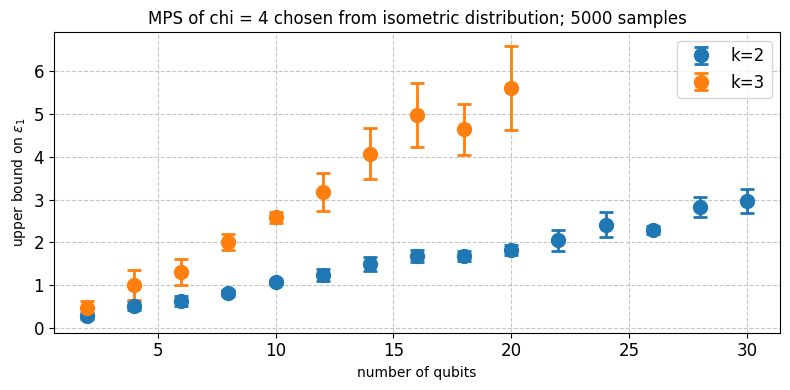

In [95]:
plt.figure(figsize=(8, 4))

k = 2
err_mean, err_std = process_data(c_data, k)
upto = 15
plt.errorbar(n_list[:upto], err_mean[:upto], yerr=err_std[:upto], fmt='o', capsize=5, capthick=2, 
             markersize=10, linewidth=2, elinewidth=2, label=f'k={k}')

k = 3
err_mean, err_std = process_data(c_data, k)
upto = 10
plt.errorbar(n_list[:upto], err_mean[:upto], yerr=err_std[:upto], fmt='o', capsize=5, capthick=2, 
             markersize=10, linewidth=2, elinewidth=2, label=f'k={k}')

plt.ylabel(f'upper bound on $\epsilon_1$')
plt.xlabel('number of qubits')
plt.title('MPS of chi = 4 chosen from isometric distribution; 5000 samples')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("isometric_constant.png")

## chi = n 

/var/folders/ht/k8lxqdrd785cq9p2gf7tckhc0018l9/T/ipykernel_13136/3088717790.py:13: RuntimeWarning: invalid value encountered in sqrt
  one_err = [np.sqrt(2**(n_list[i]*k_copies) * (p-h_purity[i])) for p in purities]


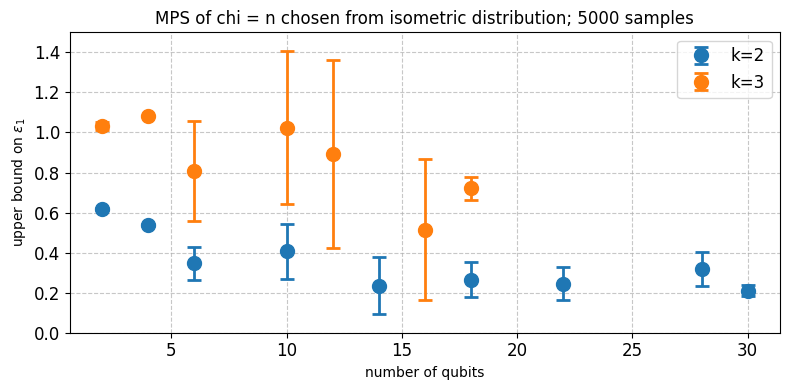

In [94]:
plt.figure(figsize=(8, 4))

k = 2
err_mean, err_std = process_data(l_data, k, batch_size=2000)
upto = 15
plt.errorbar(n_list[:upto], err_mean[:upto], yerr=err_std[:upto], fmt='o', capsize=5, capthick=2, 
             markersize=10, linewidth=2, elinewidth=2, label=f'k={k}')

k = 3
err_mean, err_std = process_data(l_data, k, batch_size=2000)
upto = 10
plt.errorbar(n_list[:upto], err_mean[:upto], yerr=err_std[:upto], fmt='o', capsize=5, capthick=2, 
             markersize=10, linewidth=2, elinewidth=2, label=f'k={k}')

plt.ylabel(f'upper bound on $\epsilon_1$')
plt.xlabel('number of qubits')
plt.title('MPS of chi = n chosen from isometric distribution; 5000 samples')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=12)
plt.ylim(0,1.5)
plt.tight_layout()
plt.savefig("isometric_linear.png")

In [70]:
k_copies = 2
h_purity = [haar_purity(n, k_copies) for n in n_list]

err_mean_2 = []
err_std_2 = []
for i in range(25):
    batches = [c_data[i,j*1000:(j+1)*1000] for j in range(5)]
    purities = [samples_to_purity(batch, k_copies) for batch in batches]
    one_err = [np.sqrt(2**(n_list[i]*k_copies) * (p-h_purity[i])) for p in purities]
    err_mean_2.append(np.mean(one_err))
    err_std_2.append(np.std(one_err))

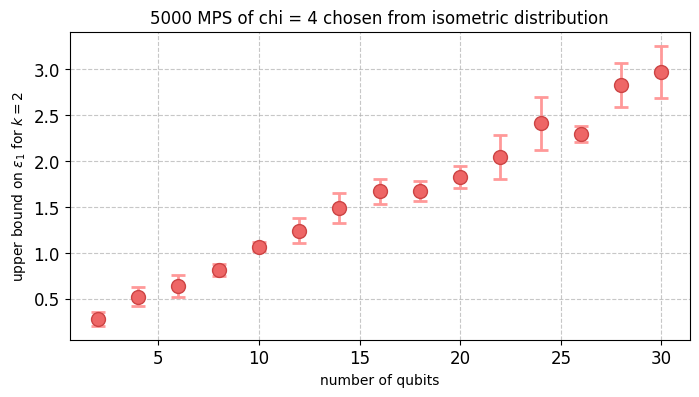

In [67]:
k_copies = 3
h_purity = [haar_purity(n, k_copies) for n in n_list]

err_mean_3 = []
err_std_3 = []
for i in range(25):
    batches = [c_data[i,j*1000:(j+1)*1000] for j in range(5)]
    purities = [samples_to_purity(batch, k_copies) for batch in batches]
    one_err = [np.sqrt(2**(n_list[i]*k_copies) * (p-h_purity[i])) for p in purities]
    err_mean_3.append(np.mean(one_err))
    err_std_3.append(np.std(one_err))

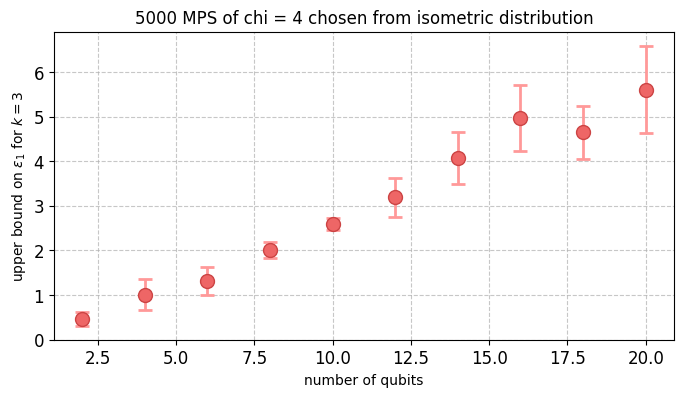

In [69]:
upto = 10
plt.figure(figsize=(8, 4))
plt.errorbar(n_list[:upto], err_mean[:upto], yerr=err_std[:upto], fmt='o', capsize=5, capthick=2, 
             ecolor='#FF9999', markeredgecolor='#CC4444', markerfacecolor='#EE6666', 
             markersize=10, linewidth=2, elinewidth=2)
plt.ylabel(f'upper bound on $\epsilon_1$ for $k={k_copies}$')
plt.xlabel('number of qubits')
plt.title('5000 MPS of chi = 4 chosen from isometric distribution')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=12)

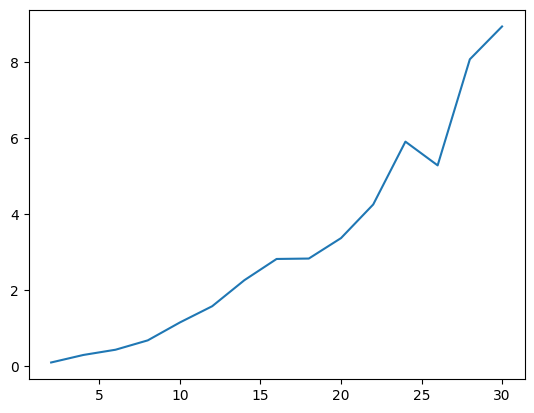

In [29]:
plt.plot(n_list[:15], one_err[:15])

In [30]:
# chi = n
k_copies = 2
l_purity = [samples_to_purity(l_data[i,:], k_copies) for i in range(25)]
h_purity = [haar_purity(n, k_copies) for n in n_list]
two_err = [lp-hp for (lp,hp) in zip(l_purity,h_purity)]
one_err = [2**(n*k_copies) * err for n,err in zip(n_list,two_err)]

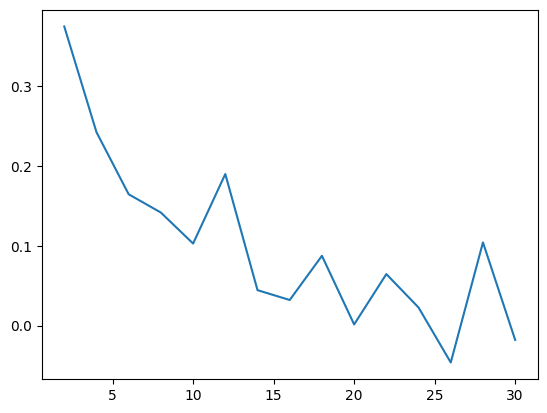

In [33]:
plt.plot(n_list[:15], one_err[:15])

In [34]:
# chi = n
k_copies = 3
l_purity = [samples_to_purity(l_data[i,:], k_copies) for i in range(25)]
h_purity = [haar_purity(n, k_copies) for n in n_list]
two_err = [lp-hp for (lp,hp) in zip(l_purity,h_purity)]
one_err = [2**(n*k_copies) * err for n,err in zip(n_list,two_err)]

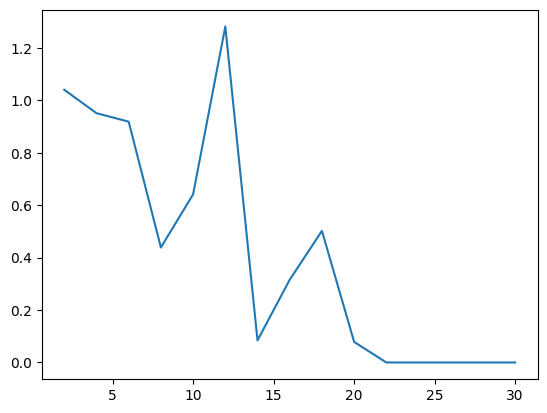

In [35]:
plt.plot(n_list[:15], one_err[:15])

In [43]:
l_data[17]

array([8.59639059e-07, 3.71066672e-06, 3.92848672e-06, ...,
       4.82333421e-06, 3.78502899e-06, 2.03240161e-06])

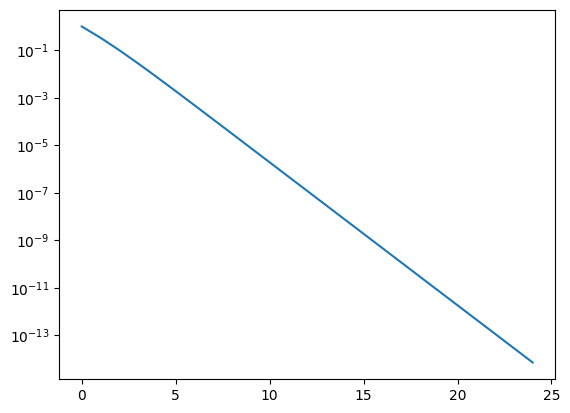

In [18]:
plt.plot(h_purity)
plt.yscale('log')

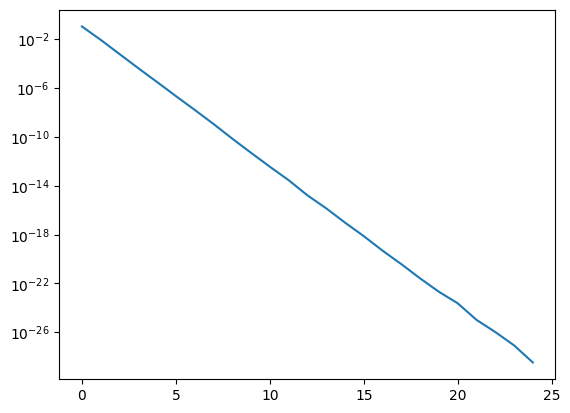

In [20]:
plt.plot(c_purity)
plt.yscale('log')

In [21]:
c_data[0,:]

array([0.37924407, 0.76555129, 0.43272471, ..., 0.31419913, 0.59543486,
       0.39695804])

In [10]:
[2**(i*2) * samples_to_purity(c_data[i,:], 2) for i in range(25)]

[0.1053576366454266,
 0.0338391559615648,
 0.009338786366766265,
 0.002597516977887568,
 0.0007661526671183095,
 0.0002176100594110288,
 6.486590546266877e-05,
 1.83470526103648e-05,
 4.597006047917187e-06,
 1.2775547737301538e-06,
 3.721286030505465e-07,
 1.1767447641015e-07,
 2.709032331350593e-08,
 9.372267952502468e-09,
 2.5441448290898437e-09,
 7.954940052725912e-10,
 2.0671351184800472e-10,
 6.488143637405259e-11,
 1.7684376822054203e-11,
 5.692678096237609e-12,
 2.605050765500686e-12,
 4.584030138900099e-13,
 1.861471476161491e-13,
 6.017603225726971e-14,
 9.584909491703491e-15]

In [11]:
[2**(i*2) * samples_to_purity(l_data[i,:], 2) for i in range(25)]

[0.12341759570821301,
 0.0331971590316376,
 0.0083346413570689,
 0.0020837174684126348,
 0.0005128767214020916,
 0.00013362503120595463,
 3.1191815688584446e-05,
 7.75114767720709e-06,
 1.9906257793199964e-06,
 4.771586181734155e-07,
 1.2304948772255873e-07,
 3.0138165873974436e-08,
 7.2780450300783635e-09,
 1.9595909662777003e-09,
 4.6145858523265223e-10,
 1.2069516582556314e-10,
 2.982223197960942e-11,
 7.184390799575875e-12,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

# Garbage

In [35]:
n = 4
k_copies = 3
p = 2

In [43]:
factors = [(p**n + k_copies - 1 - i)/(p**n) for i in range(k_copies)]
np.math.factorial(k_copies)/np.prod(factors)

5.019607843137255

In [46]:
2**(-100)

7.888609052210118e-31

In [6]:
samples = trace_samples(n, chi, num_samples=1000, scaled=False)

In [8]:
np.array(samples)**(2*k_copies)

array([2.08314382e-04, 1.57610198e-02, 6.61257355e-03, 2.72826215e-03,
       1.05516093e-01, 1.10232492e-06, 8.42003054e-02, 2.92403127e-01,
       1.37126330e-01, 1.02158780e-02, 3.11309346e-01, 1.17665657e-02,
       1.34217862e-03, 3.33259039e-02, 1.15984034e-01, 2.01111869e-01,
       5.90341477e-01, 9.85486625e-03, 4.50228418e-01, 6.73319309e-02,
       9.83599241e-03, 4.72984307e-04, 1.30264204e-02, 2.17946392e-01,
       2.01581732e-03, 2.05644732e-01, 2.97662197e-03, 1.87875516e-01,
       1.29594533e-01, 5.34633843e-02, 5.82167634e-03, 4.41090595e-02,
       2.74414219e-01, 1.21091302e-03, 1.16511313e-01, 1.28542355e-01,
       3.72241033e-02, 5.56049729e-03, 4.64352610e-02, 4.79284571e-03,
       3.64707529e-01, 2.25126538e-01, 2.43555606e-03, 4.37922776e-02,
       3.27702398e-01, 1.52183218e-01, 6.05326691e-02, 5.18095887e-01,
       9.95293757e-03, 1.81829966e-01, 9.93438067e-02, 1.48999982e-02,
       2.94966779e-02, 4.35942073e-01, 9.56865536e-02, 9.93676695e-02,
      

In [70]:
num_samples = 10
samples = [(periodic_rmps(n, chi), periodic_rmps(n, chi)) for _ in range(num_samples)]

In [82]:
avg_purity = 0.0
for prmps_a,prmps_b in samples: 
    avg_purity += np.abs(overlap(prmps_a, prmps_b, chi))**(2*k_copies)

avg_purity /= num_samples

In [83]:
avg_purity

0.00316160893581241

In [84]:
2**(n*k_copies) * avg_purity

0.809371887567977

In [93]:
prmps_a[1].shape

(3, 2, 3)

In [81]:
def overlap(prmps1, prmps2, chi, ti=False, scaled=False):
    if ti: 
        mat = transfer_matrix(prmps1, prmps2, chi, 0, scaled=scaled)
        evals = np.linalg.eigvals(mat)
        return sum(evals**len(prmps1))
    else: 
        mat_list = transfer_matrices(prmps1, prmps2, chi, ti=ti, scaled=scaled)
        return np.trace(np.linalg.multi_dot(mat_list))

In [95]:
s = np.sqrt(2)
one_err = 0.0
for prmps_a,prmps_b in samples: 
    one_err += np.abs(overlap(prmps_a, prmps_b, chi, scale=s))**(2*k_copies)

one_err = one_err/num_samples
one_err

0.8093718875679781

In [56]:
def haar_purity(n, k_copies, p=2): 
    return 1/comb(p**n + k-1, k_copies)

In [60]:
def haar_purity(n, k_copies, p=2): 
    return 1/comb(p**n + k_copies-1, k_copies)

In [15]:
k_copies = 2
n_list = np.arange(2,11)
#chi_list = [int(n) for n in n_list]
chi_list = [4 for n in n_list]
purity_against_n = [rmps_purity(n,k_copies,chi,samples=2000) for (n,chi) in tqdm(zip(n_list,chi_list))]

0it [00:00, ?it/s]

In [23]:
haar_purities = [haar_purity(n,k_copies) for n in n_list]

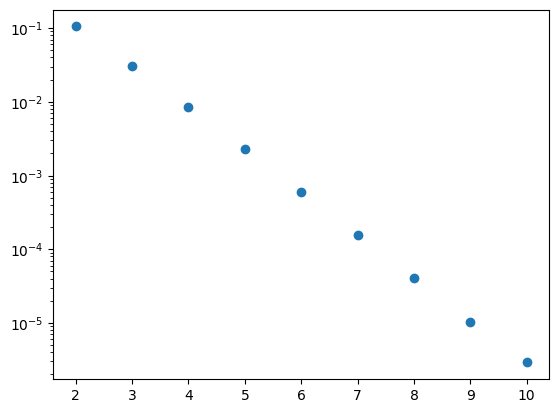

In [24]:
plt.scatter(n_list, purity_against_n)
plt.yscale('log')

In [25]:
purity_against_n

[0.10520158949207128,
 0.03063260886713787,
 0.008414974120271285,
 0.002274234968835277,
 0.0006025247037295882,
 0.0001567398033144062,
 4.0562262254290674e-05,
 1.0310102007239352e-05,
 2.9073667030272206e-06]

In [26]:
two_norm_against_n

NameError: name 'two_norm_against_n' is not defined

In [27]:
two_norm_against_n = np.array(purity_against_n) - np.array(haar_purities)
one_norm_against_n = [2**(n*k_copies)*err for (n,err) in zip(n_list,two_norm_against_n)]

In [28]:
one_norm_against_n

[0.08322543187314047,
 0.18270918971904604,
 0.2718804336129783,
 0.3894226686933844,
 0.4987104172456238,
 0.5835288134722236,
 0.6660705202645087,
 0.7066300160633356,
 1.050546167505666]

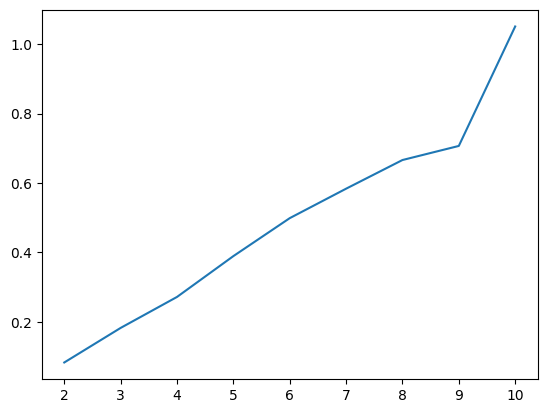

In [29]:
plt.plot(n_list, one_norm_against_n)
#plt.plot(n_list, 6/n_list**0.1)

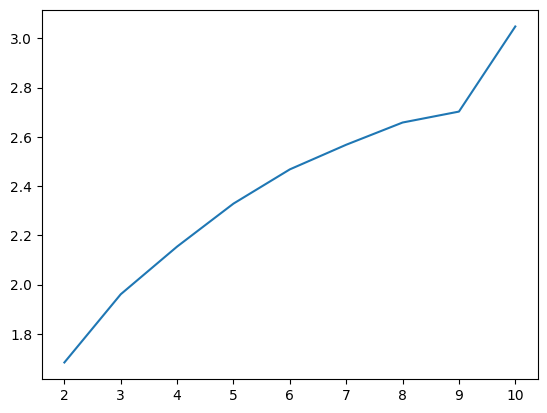

In [30]:
plt.plot(n_list, [purity*2**(n*k_copies) for (n,purity) in zip(n_list,purity_against_n)])

In [55]:
haar_purity(39,2)

4.135903062770781e-25

In [2]:
n = 4
k_copies = 3
chi_list = np.arange(2,5)
purity_against_chi = [rmps_purity(n, k_copies, chi) for chi in tqdm(chi_list)]

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:51<00:00, 17.16s/it]


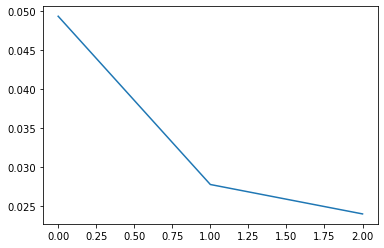

In [7]:
plt.plot(purity_against_chi)
#plt.yscale('log')

In [4]:
purity_against_chi

[0.04929004045338683, 0.02777153587219735, 0.024010244700037205]